In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#read in data
df = pd.read_csv('DDR4_RAM_benchmark_v3.csv')
df

,Memory Name,Generation,Latency (ns),Read Uncached (GB/s),Write (GB/s),Price (USD)
0,ACPI Digital Co. Ltd. CMA6-4FA01AAR01A00 4GB,DDR4,24,11.9,6.3,NaN
1,A-DATA Technology 11137401 8GB,DDR4,40,15.1,7.3,NaN
2,A-DATA Technology AD4S3200316G22-BHYD 16GB,DDR4,66,13.9,13.2,NaN
3,A-DATA Technology AD4S320038G22-B 8GB,DDR4,41,15.2,10.4,NaN
4,A-DATA Technology AD4U240038G17-BHYA 8GB,DDR4,23,14.4,9.0,NaN
...,...,...,...,...,...,...
4259,Wilk Elektronik S.A. W-HK26S16G 16GB,DDR4,27,17.6,13.6,NaN
4260,Wilk Elektronik S.A. W-MEM2666S416G 16GB,DDR4,24,16.9,14.5,NaN
4261,Xinshirui (Shenzhen) Electronics Co V01D4L84GB...,DDR4,74,13.6,7.7,NaN
4262,Xinshirui (Shenzhen) Electronics Co V01D4LF8GB...,DDR4,73,15.2,9.1,NaN


In [3]:
#take a look at the available variables
df.columns

Index(['Memory Name', 'Generation', 'Latency (ns)', 'Read Uncached (GB/s)',
       'Write (GB/s)', 'Price (USD)'],
      dtype='object')

In [4]:
#drop null values in the price column. (this could be done with the dropna() method and might be more efficient)
price_df = df[df['Price (USD)'].isna().apply(lambda x: not x)]

In [5]:
#take a look at the dataframe.
price_df.head()

,Memory Name,Generation,Latency (ns),Read Uncached (GB/s),Write (GB/s),Price (USD)
66,A-DATA Technology DDR4 3000 8GB,DDR4,30,17.0,13.4,389.99
415,Corsair CMD128GX4M8A2400C14 16GB,DDR4,32,12.1,9.1,999.99
416,Corsair CMD128GX4M8A2666C15 16GB,DDR4,39,13.4,12.8,879.99
417,Corsair CMD128GX4M8B2800C14 16GB,DDR4,27,14.8,10.6,969.99
418,Corsair CMD128GX4M8B3000C16 16GB,DDR4,26,14.8,10.2,977.79


In [6]:
#normalize the data via min-max
norm_df = price_df.select_dtypes([np.number]).apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [7]:
#verify that the data has been normalized
norm_df

,Latency (ns),Read Uncached (GB/s),Write (GB/s),Price (USD)
66,0.170732,0.664773,0.643357,0.380144
415,0.195122,0.386364,0.342657,1.000000
416,0.280488,0.460227,0.601399,0.878061
417,0.134146,0.539773,0.447552,0.969515
418,0.121951,0.539773,0.419580,0.977441
...,...,...,...,...
4107,0.158537,0.732955,0.818182,0.155584
4108,0.146341,0.926136,0.979021,0.297846
4109,0.182927,0.818182,0.930070,0.643339
4110,0.121951,0.676136,0.902098,0.131196


In [8]:
#stats imports 
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_partregress_grid


In [9]:
#generate and fit the model
y = norm_df['Price (USD)']
X = norm_df[['Latency (ns)', 'Read Uncached (GB/s)','Write (GB/s)']]
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
residuals = model.resid
predictions = model.predict(X)

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price (USD)   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     41.22
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           2.17e-24
Time:                        11:59:43   Log-Likelihood:                 82.668
No. Observations:                 652   AIC:                            -157.3
Df Residuals:                     648   BIC:                            -139.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1745      0.054      3.229      0.001       0.068       0.281
Latency (ns)             0.0113      0.079      0.143      0.886      -0.144       0.166
Read Uncached (GB/s)    -0.8273      0.109     -7.571      0.000      -1.042      -0.613
Write (GB/s)             0.9607      0.090     10.616      0.000       0.783       1.138
==============================================================================
Omnibus:                      191.989   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              443.540
Skew:                           1.567   Prob(JB):                     4.86e-97
Kurtosis:                       5.551   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

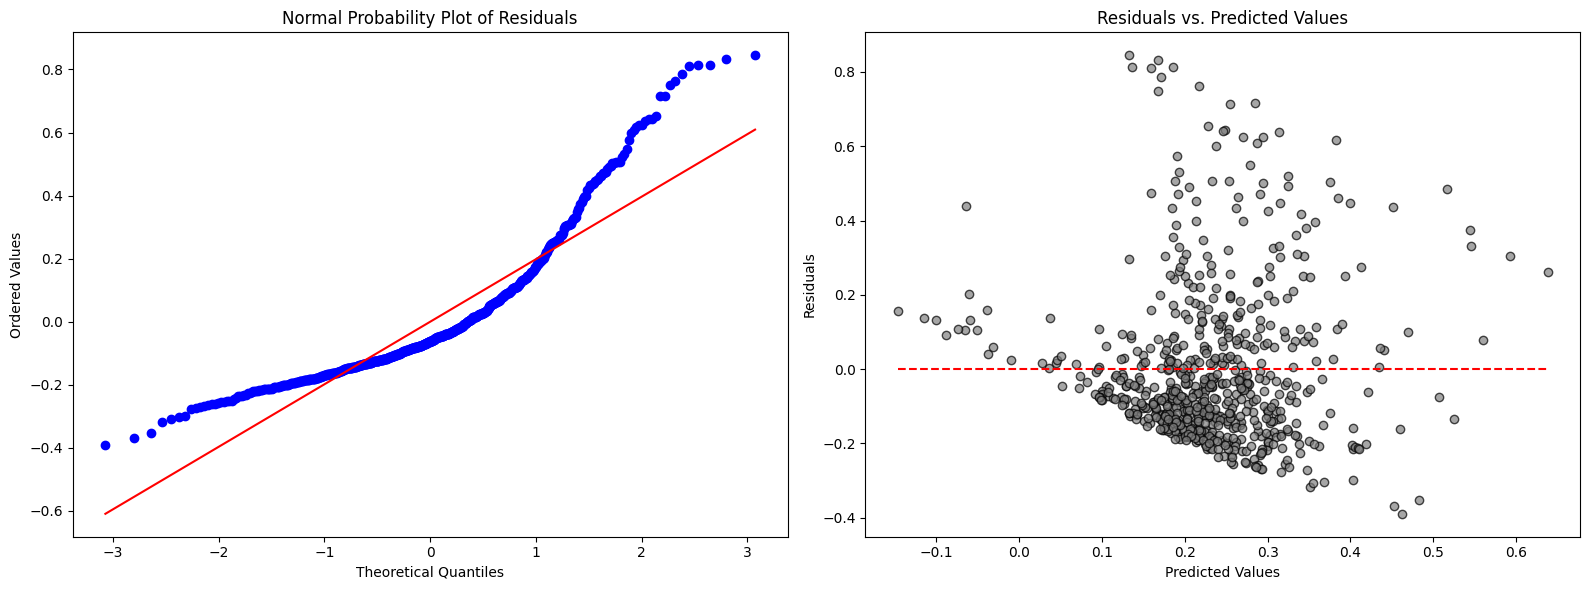

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# First plot: Normal Probability Plot of Residuals.
stats.probplot(model.resid, dist="norm", plot=axs[0])
axs[0].set_title('Normal Probability Plot of Residuals')
axs[0].set_xlabel('Theoretical Quantiles')
axs[0].set_ylabel('Ordered Values')

# Second plot: Residuals vs. Predicted Values.
axs[1].scatter(predictions, residuals, edgecolor='k', facecolor='grey', alpha=0.7)
axs[1].hlines(y=0, xmin=min(predictions), xmax=max(predictions), color='red', linestyle='--')
axs[1].set_title('Residuals vs. Predicted Values')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')

# Improve layout and show plot.
plt.tight_layout()
plt.show()

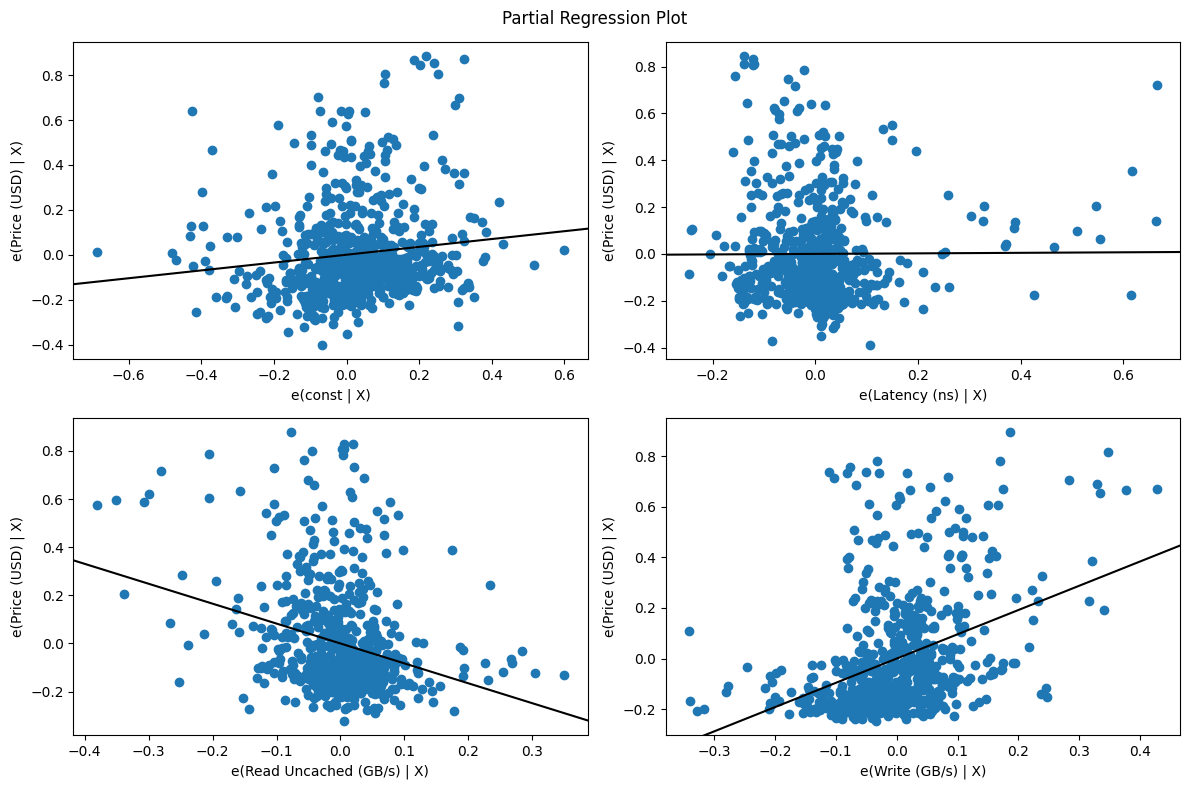

In [12]:
fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(model, fig=fig)
plt.tight_layout()
plt.show()

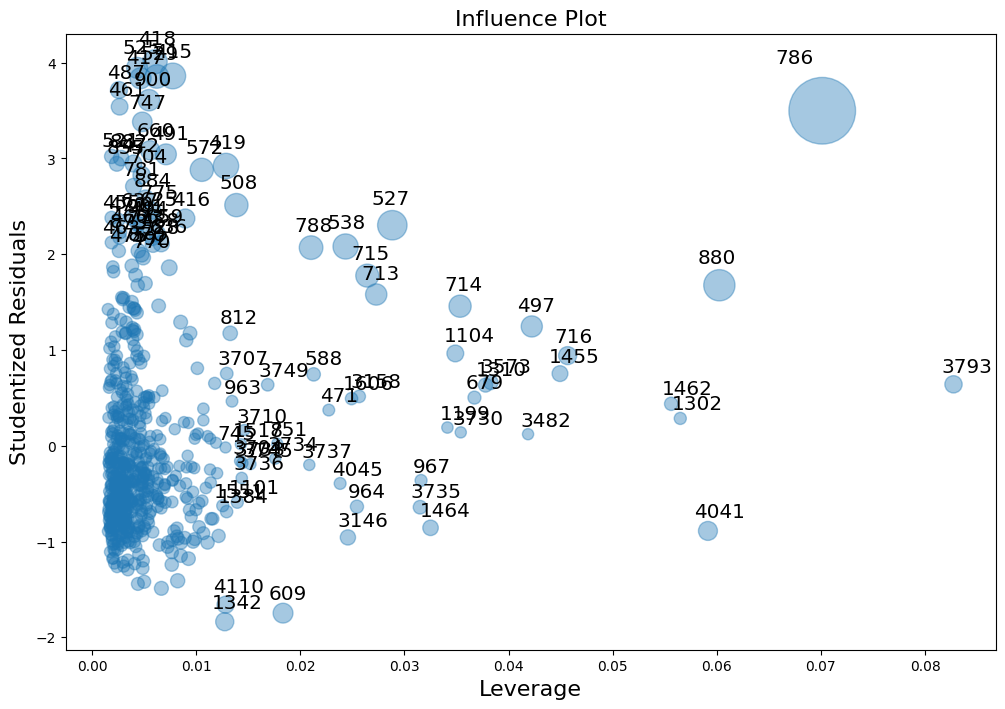

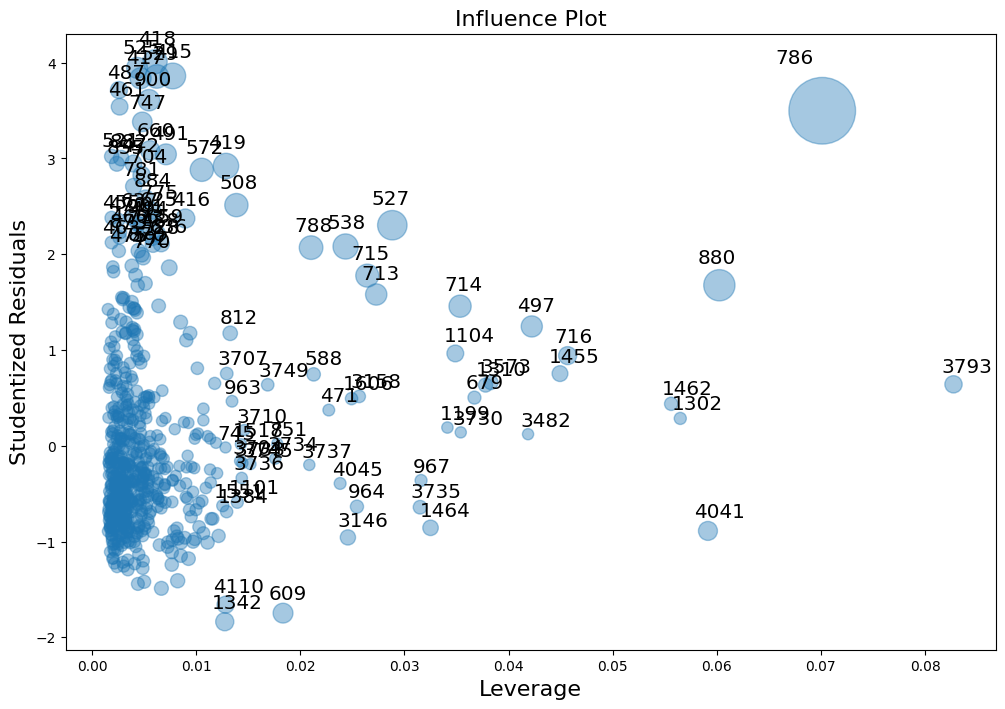

In [26]:

fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.influence_plot(model, ax=ax,
                           plot_alpha=0.4,  # Optional: Adjust transparency of points
                           edgecolors='black',  # Color of the outline
                           linewidths=4,  # Width of the outline
                           marker='o',  # Optional: Shape of the marker, 'o' is the default
                           annotate=False)

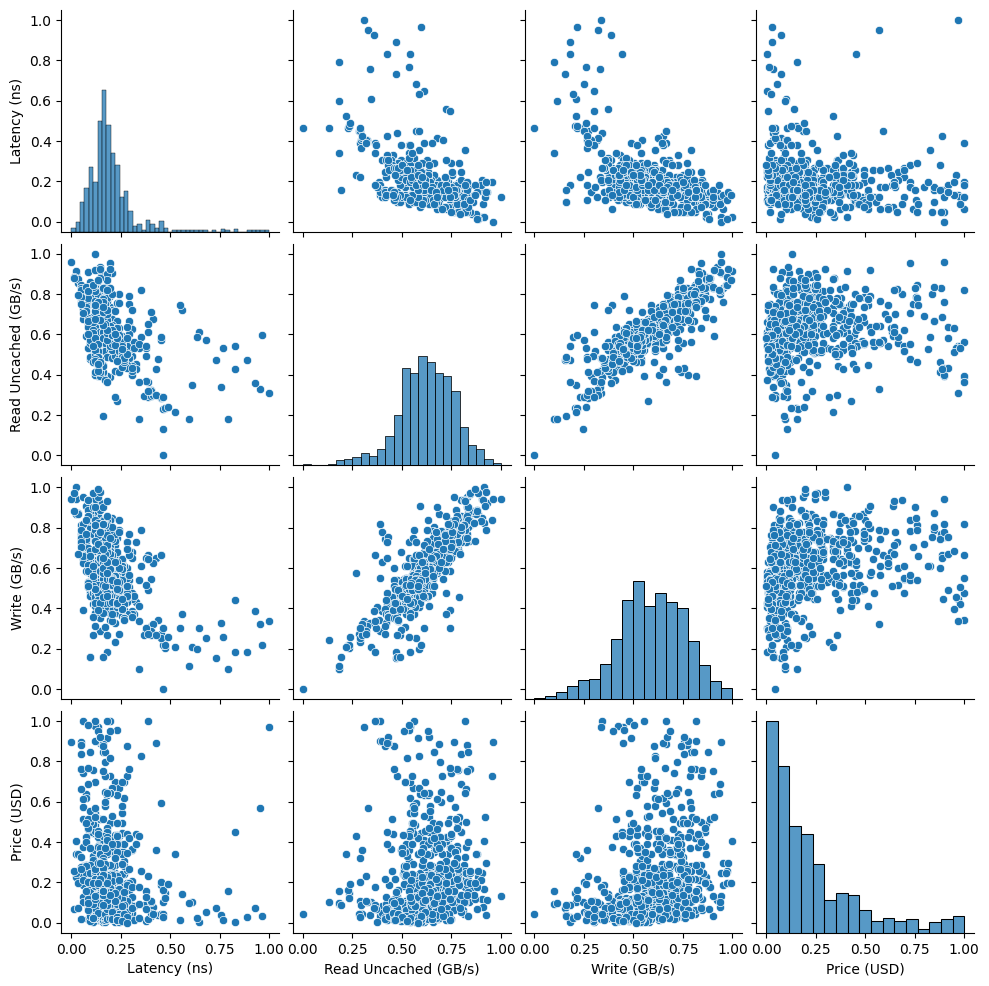

In [14]:
#make the pairplot
sns.pairplot(norm_df)

In [15]:
#apply the box-cox transformation to the price column
t_norm_df = norm_df.copy()
t_norm_df = t_norm_df + 1
t_norm_df['Price (USD)'], _ = stats.boxcox(t_norm_df['Price (USD)'])

In [16]:
t_norm_df.shape

(652, 4)

In [17]:
#generate and fit the model
y = t_norm_df['Price (USD)']
X = t_norm_df[['Latency (ns)', 'Read Uncached (GB/s)','Write (GB/s)']]
X = sm.add_constant(X)
model2 = sm.OLS(y,X).fit()
residuals2 = model2.resid
predictions2 = model2.predict(X)

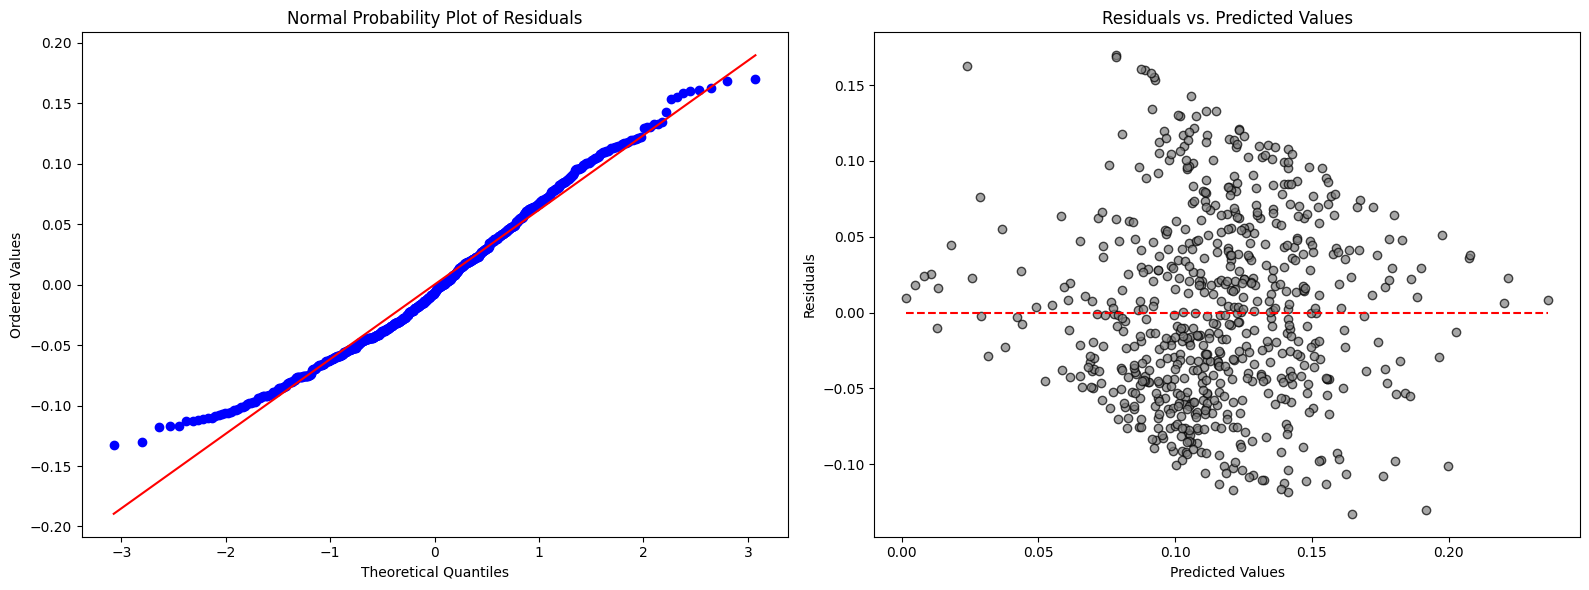

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# First plot: Normal Probability Plot of Residuals.
stats.probplot(residuals2, dist="norm", plot=axs[0])
axs[0].set_title('Normal Probability Plot of Residuals')
axs[0].set_xlabel('Theoretical Quantiles')
axs[0].set_ylabel('Ordered Values')

# Second plot: Residuals vs. Predicted Values.
axs[1].scatter(predictions2, residuals2, edgecolor='k', facecolor='grey', alpha=0.7)
axs[1].hlines(y=0, xmin=min(predictions2), xmax=max(predictions2), color='red', linestyle='--')
axs[1].set_title('Residuals vs. Predicted Values')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')

# Improve layout and show plot.
plt.tight_layout()
plt.show()

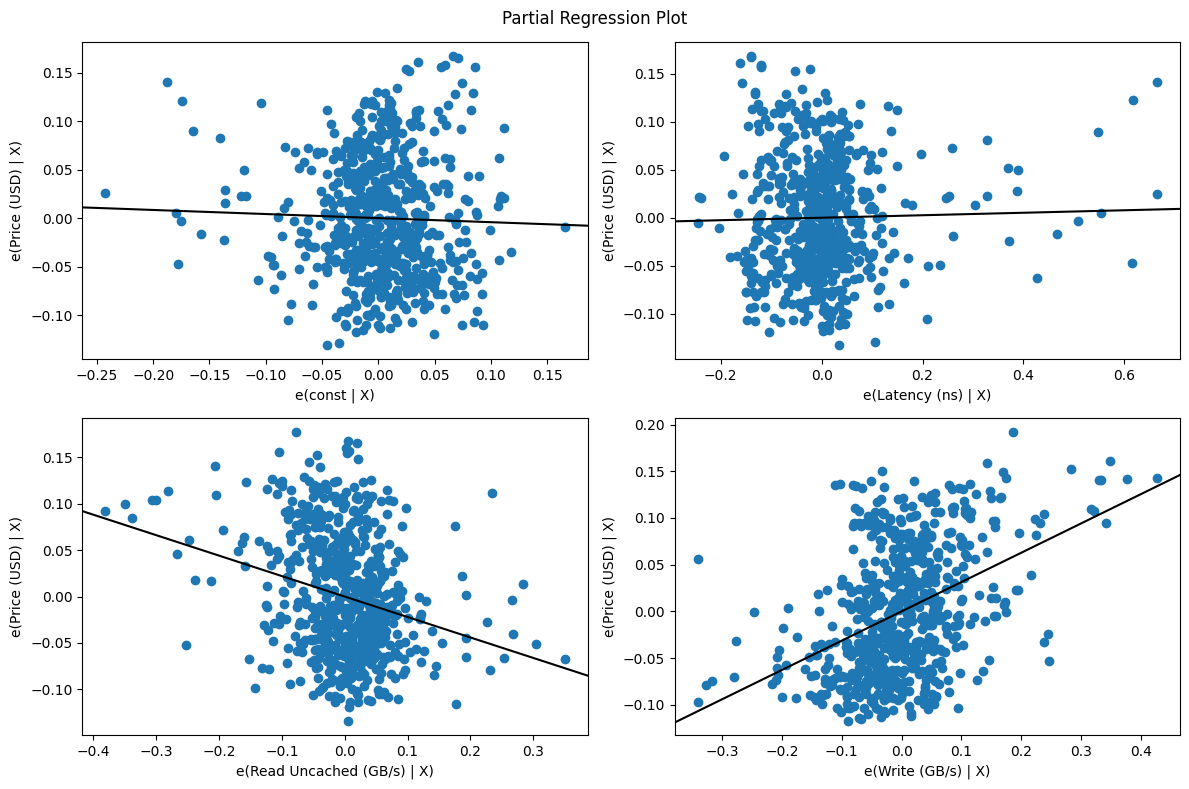

In [19]:
fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(model2, fig=fig)
plt.tight_layout()
plt.show()

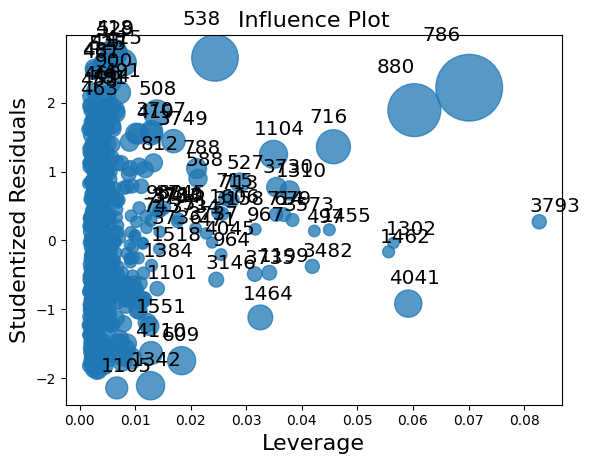

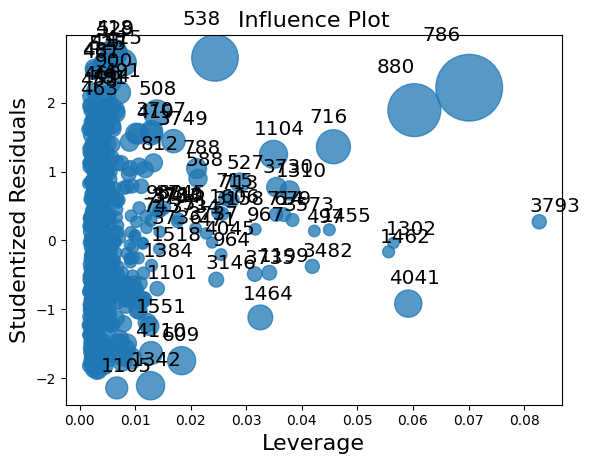

In [20]:
influence = OLSInfluence(model2)
influence.plot_influence()

In [20]:
#from the influence plot we see that there are outliers in the data. remove them and re-fit the model
out_norm_df = t_norm_df.drop(influence.resid_studentized[influence.resid_studentized > 2.5].index)
out_norm_df.shape

(645, 4)

In [21]:

#generate and fit the model
y = t_norm_df['Price (USD)']
X = t_norm_df[['Latency (ns)', 'Read Uncached (GB/s)','Write (GB/s)']]
X = sm.add_constant(X)
model2 = sm.OLS(y,X).fit()
residuals2 = model2.resid
predictions2 = model2.predict(X)

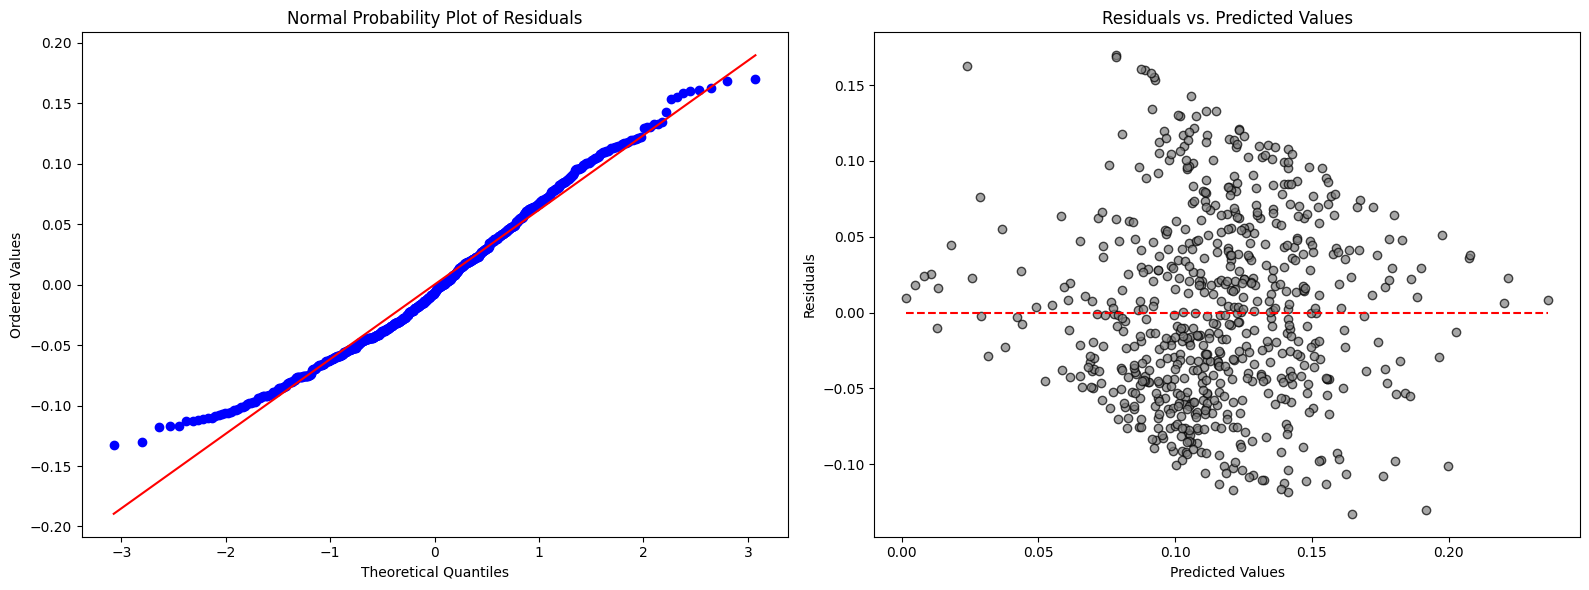

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# First plot: Normal Probability Plot of Residuals.
stats.probplot(residuals2, dist="norm", plot=axs[0])
axs[0].set_title('Normal Probability Plot of Residuals')
axs[0].set_xlabel('Theoretical Quantiles')
axs[0].set_ylabel('Ordered Values')

# Second plot: Residuals vs. Predicted Values.
axs[1].scatter(predictions2, residuals2, edgecolor='k', facecolor='grey', alpha=0.7)
axs[1].hlines(y=0, xmin=min(predictions2), xmax=max(predictions2), color='red', linestyle='--')
axs[1].set_title('Residuals vs. Predicted Values')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')

# Improve layout and show plot.
plt.tight_layout()
plt.show()

In [23]:
#since the boxcox transformation did not improve the model, we will apply the arcsinh transformation to the price column as per the textbook
t_norm_df['Price (USD)'] = np.arcsinh(np.sqrt(t_norm_df['Price (USD)']))


In [24]:
#generate and fit the model
y = t_norm_df['Price (USD)']
X = t_norm_df[['Latency (ns)', 'Read Uncached (GB/s)','Write (GB/s)']]
X = sm.add_constant(X)
model3 = sm.OLS(y,X).fit()
residuals3 = model3.resid
predictions3 = model3.predict(X)

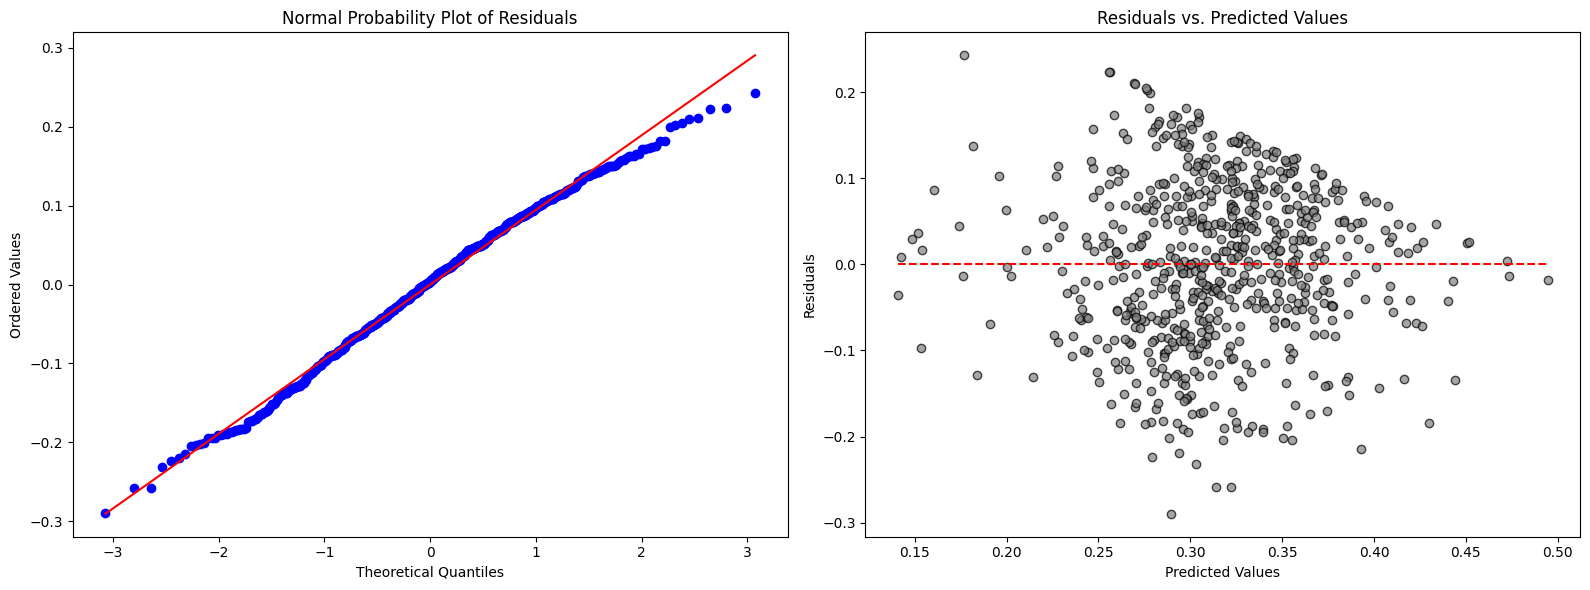

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# First plot: Normal Probability Plot of Residuals.
stats.probplot(residuals3, dist="norm", plot=axs[0])
axs[0].set_title('Normal Probability Plot of Residuals')
axs[0].set_xlabel('Theoretical Quantiles')
axs[0].set_ylabel('Ordered Values')

# Second plot: Residuals vs. Predicted Values.
axs[1].scatter(predictions3, residuals3, edgecolor='k', facecolor='grey', alpha=0.7)
axs[1].hlines(y=0, xmin=min(predictions3), xmax=max(predictions3), color='red', linestyle='--')
axs[1].set_title('Residuals vs. Predicted Values')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')

# Improve layout and show plot.
plt.tight_layout()
plt.show()

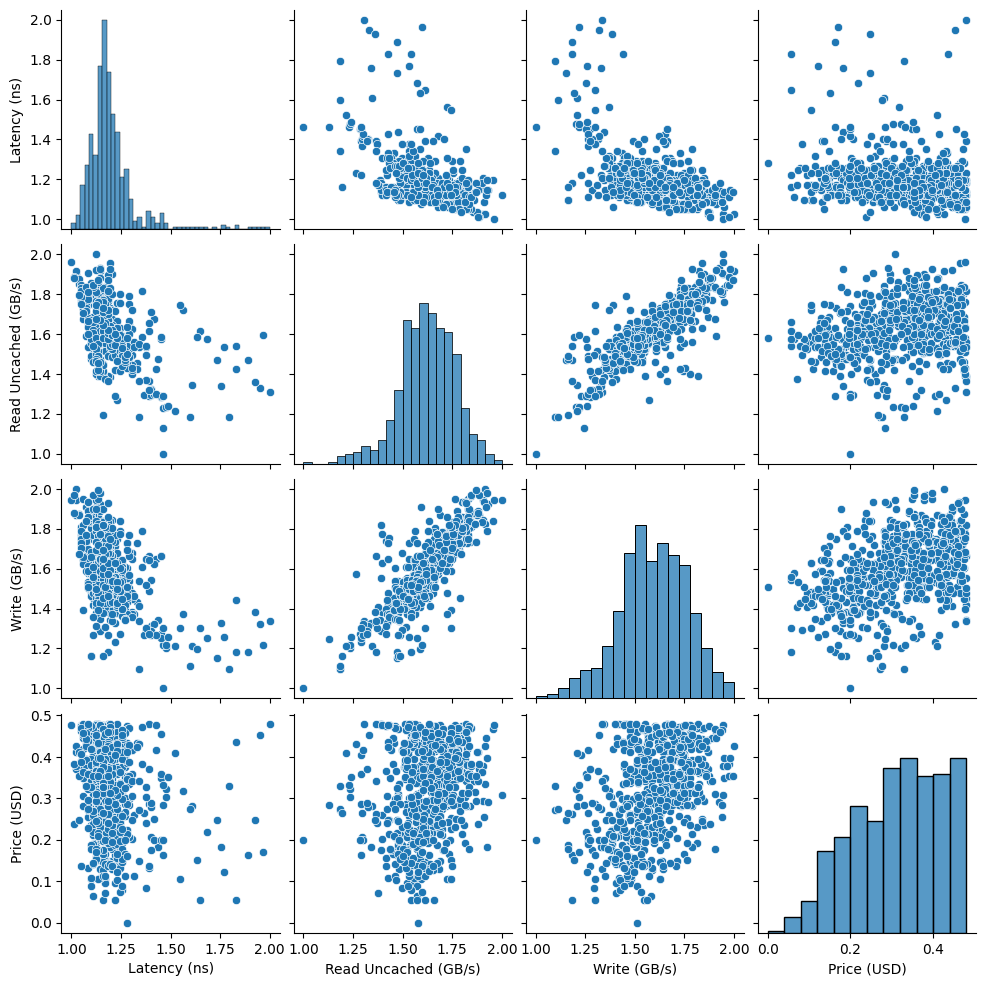

In [26]:
sns.pairplot(t_norm_df)

In [28]:
#since there seems to be multicollinearity in the data, we will search for the best subset of predictors by eliminating the least contributing predictors with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each predictor
def calculate_vif(df):
    vif_df = pd.DataFrame()
    vif_df["Variable"] = df.columns
    vif_df["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_df

# Call the function with your dataframe
vif_values = calculate_vif(t_norm_df)

# Print the VIF values
print(vif_values)


               Variable         VIF
0          Latency (ns)   36.446395
1  Read Uncached (GB/s)  387.912553
2          Write (GB/s)  359.009731
3           Price (USD)   12.322241


In [22]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_regression(target, predictor1, predictor2, predictor3, model):
    # Create a figure for plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # The target data directly impacts the sphere size (diameter) visualization
    # Adjust size scale for visibility in the plot, multiplying by a factor for better visibility
    scaled_target = target * 100  # Adjust the multiplier based on your visualization needs
    
    # Plotting each data point
    sc = ax.scatter(predictor1, predictor2, predictor3, s=scaled_target)

    # Creating a meshgrid for the plane
    x_surf = np.linspace(predictor1.min(), predictor1.max(), 50)
    y_surf = np.linspace(predictor2.min(), predictor2.max(), 50)
    x_surf, y_surf = np.meshgrid(x_surf, y_surf)
    
    # Predict z values based on the meshgrid
    # Assuming model includes a constant; adjust if necessary
    exog = pd.DataFrame({
        'const': 1,  # Ensure this aligns with how the model was specified
        predictor1.name: x_surf.ravel(),
        predictor2.name: y_surf.ravel(),
        predictor3.name: np.repeat(np.median(predictor3), 50*50)
    })
    z_surf = model.predict(exog).reshape(x_surf.shape)
    
    # Plot the fitted surface
    ax.plot_surface(x_surf, y_surf, z_surf, color='m', alpha=0.3)

    # Label the axes
    ax.set_xlabel(predictor1.name)
    ax.set_ylabel(predictor2.name)
    ax.set_zlabel(predictor3.name)

    # Show plot
    plt.show()

ValueError: shapes (2500,4) and (3,) not aligned: 4 (dim 1) != 3 (dim 0)

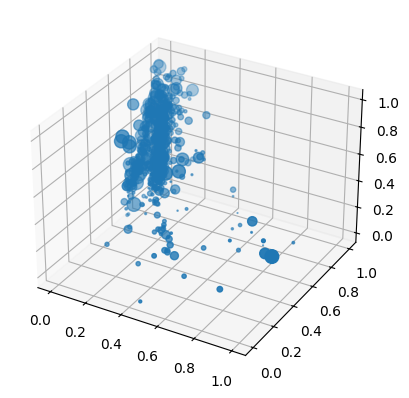

In [27]:
plot_3d_regression(y, norm_df['Latency (ns)'], norm_df['Read Uncached (GB/s)'], norm_df['Write (GB/s)'], model)

<h1>Things that would assist with building a more viable model could include having the price data fully populated, new continuous variables such as power usage or benchmark scores, and possibly an exploration of the data collection methods.